<a href="https://colab.research.google.com/github/DiegoLLP123/upsrj-machine-learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

En este bloque se importan las librerías necesarias para el desarrollo del modelo de clasificación. Se utilizan herramientas para generación de datos, preprocesamiento, entrenamiento del modelo, evaluación de métricas y visualización gráfica.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Generación del conjunto de datos sintético

Se crea una base de datos artificial con 500 muestras y dos características informativas, sin variables redundantes. Esto permite simular un problema de clasificación binaria controlado para probar el modelo de regresión logística.

In [3]:
# 1. tenemos una base de datos con 500 muestras
# 2. tenemos dos features
# 3. no hay features redundantes
# 4. numero de features informativos
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)
print(X)
print(y)

[[ 1.00845498e+00 -1.04700975e+00]
 [ 3.26021382e-01  5.02540973e-01]
 [ 1.02420498e+00 -1.79714286e+00]
 [ 1.21880067e-01  1.05937142e+00]
 [ 3.90997326e-02  3.82369370e-01]
 [ 1.26221796e+00 -7.60726298e-01]
 [ 7.51010599e-01  8.79395978e-01]
 [-7.49552409e-01 -1.31748509e-01]
 [ 3.97777110e-01  6.94304161e-01]
 [ 1.60117355e+00  1.31994147e+00]
 [ 2.65997363e+00 -2.92346297e+00]
 [ 1.39309699e+00 -2.61327073e+00]
 [ 3.25885001e-01 -1.52748814e+00]
 [ 5.54900000e-01  6.62973369e-01]
 [ 1.36121142e-01  1.15068994e+00]
 [ 7.92352807e-01  8.42255922e-01]
 [ 9.46116447e-01  9.05699594e-01]
 [ 1.05575841e-01 -4.29081227e-01]
 [-5.38715030e-04 -1.40426119e+00]
 [ 2.28144543e+00 -1.37667072e+00]
 [ 1.78152502e+00 -1.37344458e+00]
 [ 1.73498800e+00  1.49257599e+00]
 [ 1.49176434e+00 -1.94288103e+00]
 [ 1.09767386e+00  1.07962466e+00]
 [-6.55458394e-01 -9.19380551e-02]
 [-1.31469894e+00 -3.74656287e-01]
 [ 3.05164386e+00  2.25545315e+00]
 [ 2.86514241e+00 -1.49525943e+00]
 [ 1.87384662e+00 -3

# División de datos en entrenamiento y prueba

Los datos se separan en dos subconjuntos: uno para entrenar el modelo y otro para evaluarlo. Se utiliza el 70% para entrenamiento y el 30% para pruebas, garantizando que el modelo se valide con datos no vistos previamente.

In [4]:
# Dividimos datos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
print(X_train)
print(X_test)

[[ 1.26221796 -0.7607263 ]
 [ 0.07936047  0.14227533]
 [ 0.93830337  0.8657095 ]
 [ 0.94611645  0.90569959]
 [ 1.59639415 -2.1477264 ]
 [-0.55186544  0.0445142 ]
 [ 0.12188007  1.05937142]
 [ 0.72366431 -0.09472272]
 [ 0.96091123 -1.23346074]
 [ 1.46668332  1.38715656]
 [ 0.31114247  0.58998764]
 [ 0.64776607  0.75362488]
 [ 0.59599436  0.73358369]
 [ 0.5137828   0.58766264]
 [ 0.43208132 -0.93884228]
 [ 1.313692   -0.88171605]
 [ 3.05164386  2.25545315]
 [-0.74955241 -0.13174851]
 [ 1.38473827  1.17135933]
 [-0.7385946  -0.09387867]
 [ 1.03346774  1.04987505]
 [ 2.83974868  2.23683075]
 [ 1.33236776 -1.33050678]
 [ 0.695858    0.82358346]
 [ 0.08905981  0.43539717]
 [ 1.02349583  0.9690128 ]
 [ 0.41804685  0.5920414 ]
 [ 0.91616965 -1.38496952]
 [ 2.6203283   2.07582499]
 [ 2.34524196 -3.2190333 ]
 [ 0.58021635 -0.96362306]
 [-0.18820613  1.34201466]
 [ 0.2304976   0.27857988]
 [ 0.80948092 -0.02394414]
 [-0.37252418  0.10243277]
 [ 1.21322436 -0.56108525]
 [ 0.12985886  0.44106538]
 

# Escalamiento y preprocesamiento de datos

Se aplica una normalización mediante StandardScaler para que las variables tengan media cero y desviación estándar uno. Esto mejora el rendimiento del modelo y evita que alguna característica domine el proceso de aprendizaje.

In [5]:
# Escalamos datos para procesar (preprocesamiento)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 2.78796077e-01 -5.66313563e-01]
 [-1.12130253e+00  8.27359395e-02]
 [-1.04607982e-01  6.02717942e-01]
 [-9.53599754e-02  6.31461576e-01]
 [ 6.74346357e-01 -1.56324613e+00]
 [-1.86845806e+00  1.24682811e-02]
 [-1.07097387e+00  7.41916108e-01]
 [-3.58667198e-01 -8.76108913e-02]
 [-7.78480106e-02 -9.06100391e-01]
 [ 5.20813108e-01  9.77517875e-01]
 [-8.46951934e-01  4.04537634e-01]
 [-4.48504758e-01  5.22155000e-01]
 [-5.09784746e-01  5.07750011e-01]
 [-6.07095104e-01  4.02866498e-01]
 [-7.03801714e-01 -6.94337794e-01]
 [ 3.39723726e-01 -6.53277239e-01]
 [ 2.39686416e+00  1.60162248e+00]
 [-2.10245180e+00 -1.14223877e-01]
 [ 4.23818206e-01  8.22409540e-01]
 [-2.08948150e+00 -8.70042166e-02]
 [ 8.03407372e-03  7.35090411e-01]
 [ 2.14605276e+00  1.58823728e+00]
 [ 3.61829437e-01 -9.75854067e-01]
 [-3.91580356e-01  5.72439048e-01]
 [-1.10982183e+00  2.93422808e-01]
 [-3.76925546e-03  6.76969141e-01]
 [-7.20413720e-01  4.06013814e-01]
 [-1.30806733e-01 -1.01500019e+00]
 [ 1.88633410e+00  1

# Entrenamiento del modelo de Regresión Logística

Se crea el modelo de clasificación usando regresión logística y se entrena con los datos previamente procesados. El algoritmo aprende la relación entre las características y las clases.

In [6]:
# Generamos nuestro modelo y lo alimentamos
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Generación de predicciones

El modelo entrenado se utiliza para predecir las clases de los datos de prueba. Estas predicciones permitirán evaluar el desempeño del sistema de clasificación.

In [7]:
# Generamos prediccion
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 0]


# Evaluación del modelo

Se calculan métricas de rendimiento como exactitud (accuracy), matriz de confusión y reporte de clasificación. Estas métricas permiten analizar qué tan bien el modelo clasifica los datos y detectar posibles errores.

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

Accuracy: 0.8466666666666667
Confusion matrix: [[66  9]
 [14 61]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



# Visualización de la frontera de decisión

Se define una función que permite graficar la frontera de decisión del modelo. Esto facilita comprender cómo el algoritmo separa las clases en el espacio de características.

In [9]:
def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 200),
      np.linspace(y_min, y_max, 200)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", s=50)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Logistic Regression Decision Boundary")
  plt.show()

# Representación gráfica del modelo entrenado

Se ejecuta la función de visualización usando los datos de prueba y el modelo entrenado, mostrando gráficamente la separación entre clases y la eficacia del clasificador.

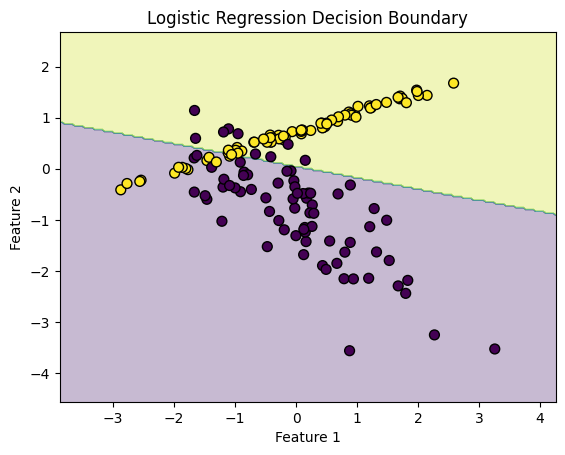

In [10]:
plot_decision_boundary(X_test, y_test, model)

# Importación del módulo Pipeline

Se importa la herramienta Pipeline de scikit-learn, la cual permite encadenar pasos de procesamiento y modelado en un único flujo estructurado y reproducible.

In [11]:
from sklearn.pipeline import Pipeline

# Construcción del flujo de procesamiento y aprendizaje

Se crea un pipeline que primero escala los datos y después entrena el modelo de regresión logística. Esto simplifica el código y evita errores al aplicar transformaciones manuales.

In [12]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Entrenamiento del modelo con Pipeline

El pipeline se entrena directamente con los datos de entrenamiento. Automáticamente se realiza el escalamiento y luego el entrenamiento del modelo.

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

# Generación de predicciones con Pipeline

Se realizan predicciones utilizando el pipeline. Internamente se aplican las transformaciones y el modelo sin necesidad de pasos adicionales.

In [14]:
y_pred_pipeline = pipeline.predict(X_test)
print(y_pred_pipeline)

[0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 0]


# Evaluación del modelo usando Pipeline

Se calculan las métricas de desempeño del modelo generado mediante pipeline para comparar su efectividad respecto al método tradicional.

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred_pipeline))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_pipeline))
print("Classification report:", classification_report(y_test, y_pred_pipeline))

Accuracy: 0.8466666666666667
Confusion matrix: [[66  9]
 [14 61]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



# Visualización de la frontera de decisión con Pipeline

Se reutiliza la función de visualización para representar gráficamente el comportamiento del modelo entrenado mediante pipeline.

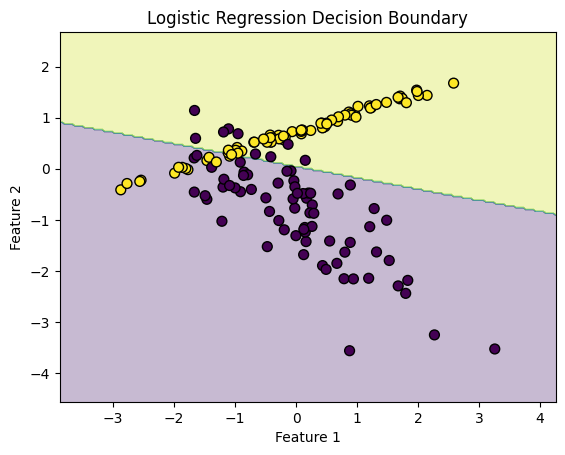

In [16]:
plot_decision_boundary(X_test, y_test, pipeline)